<a href="https://colab.research.google.com/github/adenning-1/QNC-2025/blob/main/Parametric_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Plot X vs Y. Do they look related?
2. Calculate
 and
, first using the equations above and then using either the Python numpy funciton corrcoef or Matlab's built-in corrcoef. Did you get the same answers?
3. What is the standard error of
? The 95% confidence intervals computed from the standard error?
4. Should the value of
 be considered significant at the p<0.05 level, given a two-tailed test (i.e., we reject if the test statistic is too large on either tail of the null distribution) for
?
5. Yale does the exact same study and finds that his correlation value is 0.75. Is this the same as yours? That is, evaluate
.
6. Finally, calculate the statistical power and sample size needed to reject



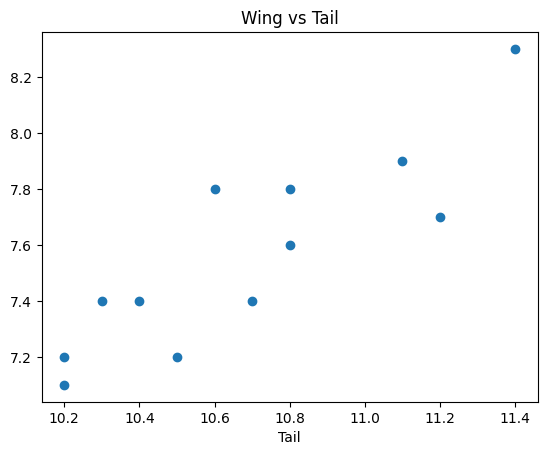

In [2]:
# Setup measured variables
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Setup DF
data = {"wing" : [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4],
        "tail" : [7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]}
data = pd.DataFrame(data)

# Plot
plt.scatter(data["wing"], data["tail"])
plt.xlabel("Wing")
plt.xlabel("Tail")
plt.title("Wing vs Tail")
plt.show()

1) Yes, the data looks related, at least by eye, with a positive correlation.

In [3]:
# Calculate using formulas above
def calculate_r(x, y):
  x = np.array(x)
  y = np.array(y)
  x_mean = np.mean(x)
  y_mean = np.mean(y)
  # Numerator
  num = np.sum((x - x_mean) * (y - y_mean))
  # Denominator
  denom = np.sqrt(np.sum((x - x_mean) **2)) * np.sqrt(np.sum((y - y_mean) **2))
  r = num / denom
  return(r)

r_xy = calculate_r(data["wing"], data["tail"])
print("Rxy = ", r_xy)
r_yx = calculate_r(data["tail"], data["wing"])
print("Ryx = ", r_xy)

python_r_xy = np.corrcoef(data["wing"], data["tail"])[0, 1]
print("Python Rxy = ", python_r_xy)


Rxy =  0.8703545613058227
Ryx =  0.8703545613058227
Python Rxy =  0.8703545613058227


2) Yes, I get the same answers using either the above formulas or the python numpy function corrcoef.

In [5]:
# Calculate standard error
n = len(data["wing"])

sr = np.sqrt((1-r_xy**2) / (n - 2))
print("Question 3: \n")
print("standard error of the r = ", sr)

# Calculate confidence intervals
z = 0.5 * np.log((1+r_xy) / (1 - r_xy))
sz = np.sqrt(1 / (n-3))
z_min = z - 1.96 * sz
z_max = z + 1.96 * sz
r_min = (np.exp(2*z_min) - 1) / (np.exp(2*z_min) + 1)
r_max = (np.exp(2*z_max) - 1) / (np.exp(2*z_max) + 1)

print("95% CI: r min: ", r_min, "r max: ", r_max)

Question 3: 

standard error of the r =  0.15571863652567375
95% CI: r min:  0.5923032846726551 r max:  0.9631607285142775


4) Yes, we can reject the H0 that Rx,y = 0 and consider this value statistically significant. The 95% confidence interval for the r value does not include 0, thus the test is significant at a p < 0.05 level.

5. No, we cannot reject Yale's hypothesis that H0 = 0.75. This value is within the 95% confidence interval for our r value, and thus we cannot reject Yale's hypothesis.

In [13]:
# Question 6: Calculate power / sample size
from statsmodels.stats.power import NormalIndPower
analysis = NormalIndPower()
effect_size = np.arctanh(0.5) # this converts r value to fischer z

# calculate power for n of data length
n_given = len(data)
power = analysis.power(effect_size=effect_size, nobs1=n_given, alpha=0.05)
print("power for shown sample size: ", power)


# Calculate n with pingouin
import pingouin as pg
n_needed = pg.power_corr(r = 0.5, n = None, power = 0.8, alpha = 0.05)
print("n for power of 0.8: ", n_needed)

power for shown sample size:  0.26993497472953326
n for power of 0.8:  28.248410463212558
